### Importing necessary libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from scipy.stats import zscore
from scipy.spatial import distance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

### Load the dataset

In [2]:
df = pd.read_csv('creditcard.csv')

### Exploratory Data Analysis

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Data Preprocessing

In [8]:
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler.fit_transform(df[['Time']])

In [9]:
df = df.drop(['Time', 'Amount'], axis=1)

### Features and Labels

In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

### Anomaly Detection Techniques

#### Z-score Method

In [11]:
z_scores = np.abs(zscore(X))
z_threshold = 3 

In [12]:
z_anomalies = (z_scores > z_threshold).any(axis=1).astype(int)

In [13]:
print("\nZ-score Anomalies Detected:\n", classification_report(y, z_anomalies))
print("Confusion Matrix (Z-score):\n", confusion_matrix(y, z_anomalies))


Z-score Anomalies Detected:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    284315
           1       0.01      0.90      0.02       492

    accuracy                           0.87    284807
   macro avg       0.51      0.89      0.48    284807
weighted avg       1.00      0.87      0.93    284807

Confusion Matrix (Z-score):
 [[246943  37372]
 [    48    444]]


### Mahalanobis Distance

In [14]:
def mahalanobis_distance(data):
    data_array = data.to_numpy() 
    mean = np.mean(data_array, axis=0)
    cov = np.cov(data_array.T)
    inv_cov = np.linalg.inv(cov)
    distances = []
    for i in range(data_array.shape[0]):
        d = distance.mahalanobis(data_array[i], mean, inv_cov)
        distances.append(d)
    return np.array(distances)

In [15]:
mahalanobis_dists = mahalanobis_distance(X)
mahalanobis_threshold = np.percentile(mahalanobis_dists, 97)
mahalanobis_anomalies = (mahalanobis_dists > mahalanobis_threshold).astype(int)

In [16]:
print("\nMahalanobis Anomalies Detected:\n", classification_report(y, mahalanobis_anomalies))
print("Confusion Matrix (Mahalanobis):\n", confusion_matrix(y, mahalanobis_anomalies))


Mahalanobis Anomalies Detected:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    284315
           1       0.05      0.83      0.09       492

    accuracy                           0.97    284807
   macro avg       0.52      0.90      0.54    284807
weighted avg       1.00      0.97      0.98    284807

Confusion Matrix (Mahalanobis):
 [[276179   8136]
 [    83    409]]


#### Isolation Forest

In [17]:
isolation_forest = IsolationForest(contamination=0.0017, random_state=42)

In [18]:
isolation_forest.fit(X)

IsolationForest(contamination=0.0017, random_state=42)

In [19]:
iso_preds = isolation_forest.predict(X)
isolation_anomalies = np.where(iso_preds == -1, 1, 0)

In [20]:
print("\nIsolation Forest Anomalies Detected:\n", classification_report(y, isolation_anomalies))
print("Confusion Matrix (Isolation Forest):\n", confusion_matrix(y, isolation_anomalies))


Isolation Forest Anomalies Detected:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.28      0.27      0.28       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807

Confusion Matrix (Isolation Forest):
 [[283965    350]
 [   357    135]]


#### Local Outlier Factor (LOF)

In [21]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.0017)

In [22]:
lof_preds = lof.fit_predict(X)
lof_anomalies = np.where(lof_preds == -1, 1, 0)

In [23]:
print("\nLOF Anomalies Detected:\n", classification_report(y, lof_anomalies))
print("Confusion Matrix (LOF):\n", confusion_matrix(y, lof_anomalies))


LOF Anomalies Detected:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807

Confusion Matrix (LOF):
 [[283830    485]
 [   492      0]]


### OneClassSVM

In [38]:
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1) 

In [39]:
ocsvm.fit(X[y == 0]) 

OneClassSVM(gamma='auto', nu=0.1)

In [40]:
ocsvm_preds = ocsvm.predict(X)
ocsvm_anomalies = np.where(ocsvm_preds == -1, 1, 0)

In [41]:
print("\nOne-Class SVM Anomalies Detected:\n", classification_report(y, ocsvm_anomalies))
print("Confusion Matrix (One-Class SVM):\n", confusion_matrix(y, ocsvm_anomalies))


One-Class SVM Anomalies Detected:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95    284315
           1       0.02      0.90      0.03       492

    accuracy                           0.90    284807
   macro avg       0.51      0.90      0.49    284807
weighted avg       1.00      0.90      0.95    284807

Confusion Matrix (One-Class SVM):
 [[255885  28430]
 [    49    443]]


### Performance Metrices

In [42]:
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1


In [43]:
metrics = {}
methods = ['Z-score', 'Mahalanobis', 'Isolation Forest', 'LOF', 'One-Class SVM']
predictions = [z_anomalies, mahalanobis_anomalies, isolation_anomalies, lof_anomalies, ocsvm_anomalies]

In [44]:
for method, pred in zip(methods, predictions):
    metrics[method] = compute_metrics(y, pred)

In [45]:
metrics_df = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
print(metrics_df)

                  Accuracy  Precision    Recall  F1 Score
Z-score           0.868613   0.011741  0.902439  0.023181
Mahalanobis       0.971142   0.047864  0.831301  0.090517
Isolation Forest  0.997518   0.278351  0.274390  0.276356
LOF               0.996570   0.000000  0.000000  0.000000
One-Class SVM     0.900006   0.015343  0.900407  0.030172


In [46]:
scaled_features = scaler.fit_transform(X)

pca = PCA(n_components=2)
scaled_data = pca.fit_transform(scaled_features)

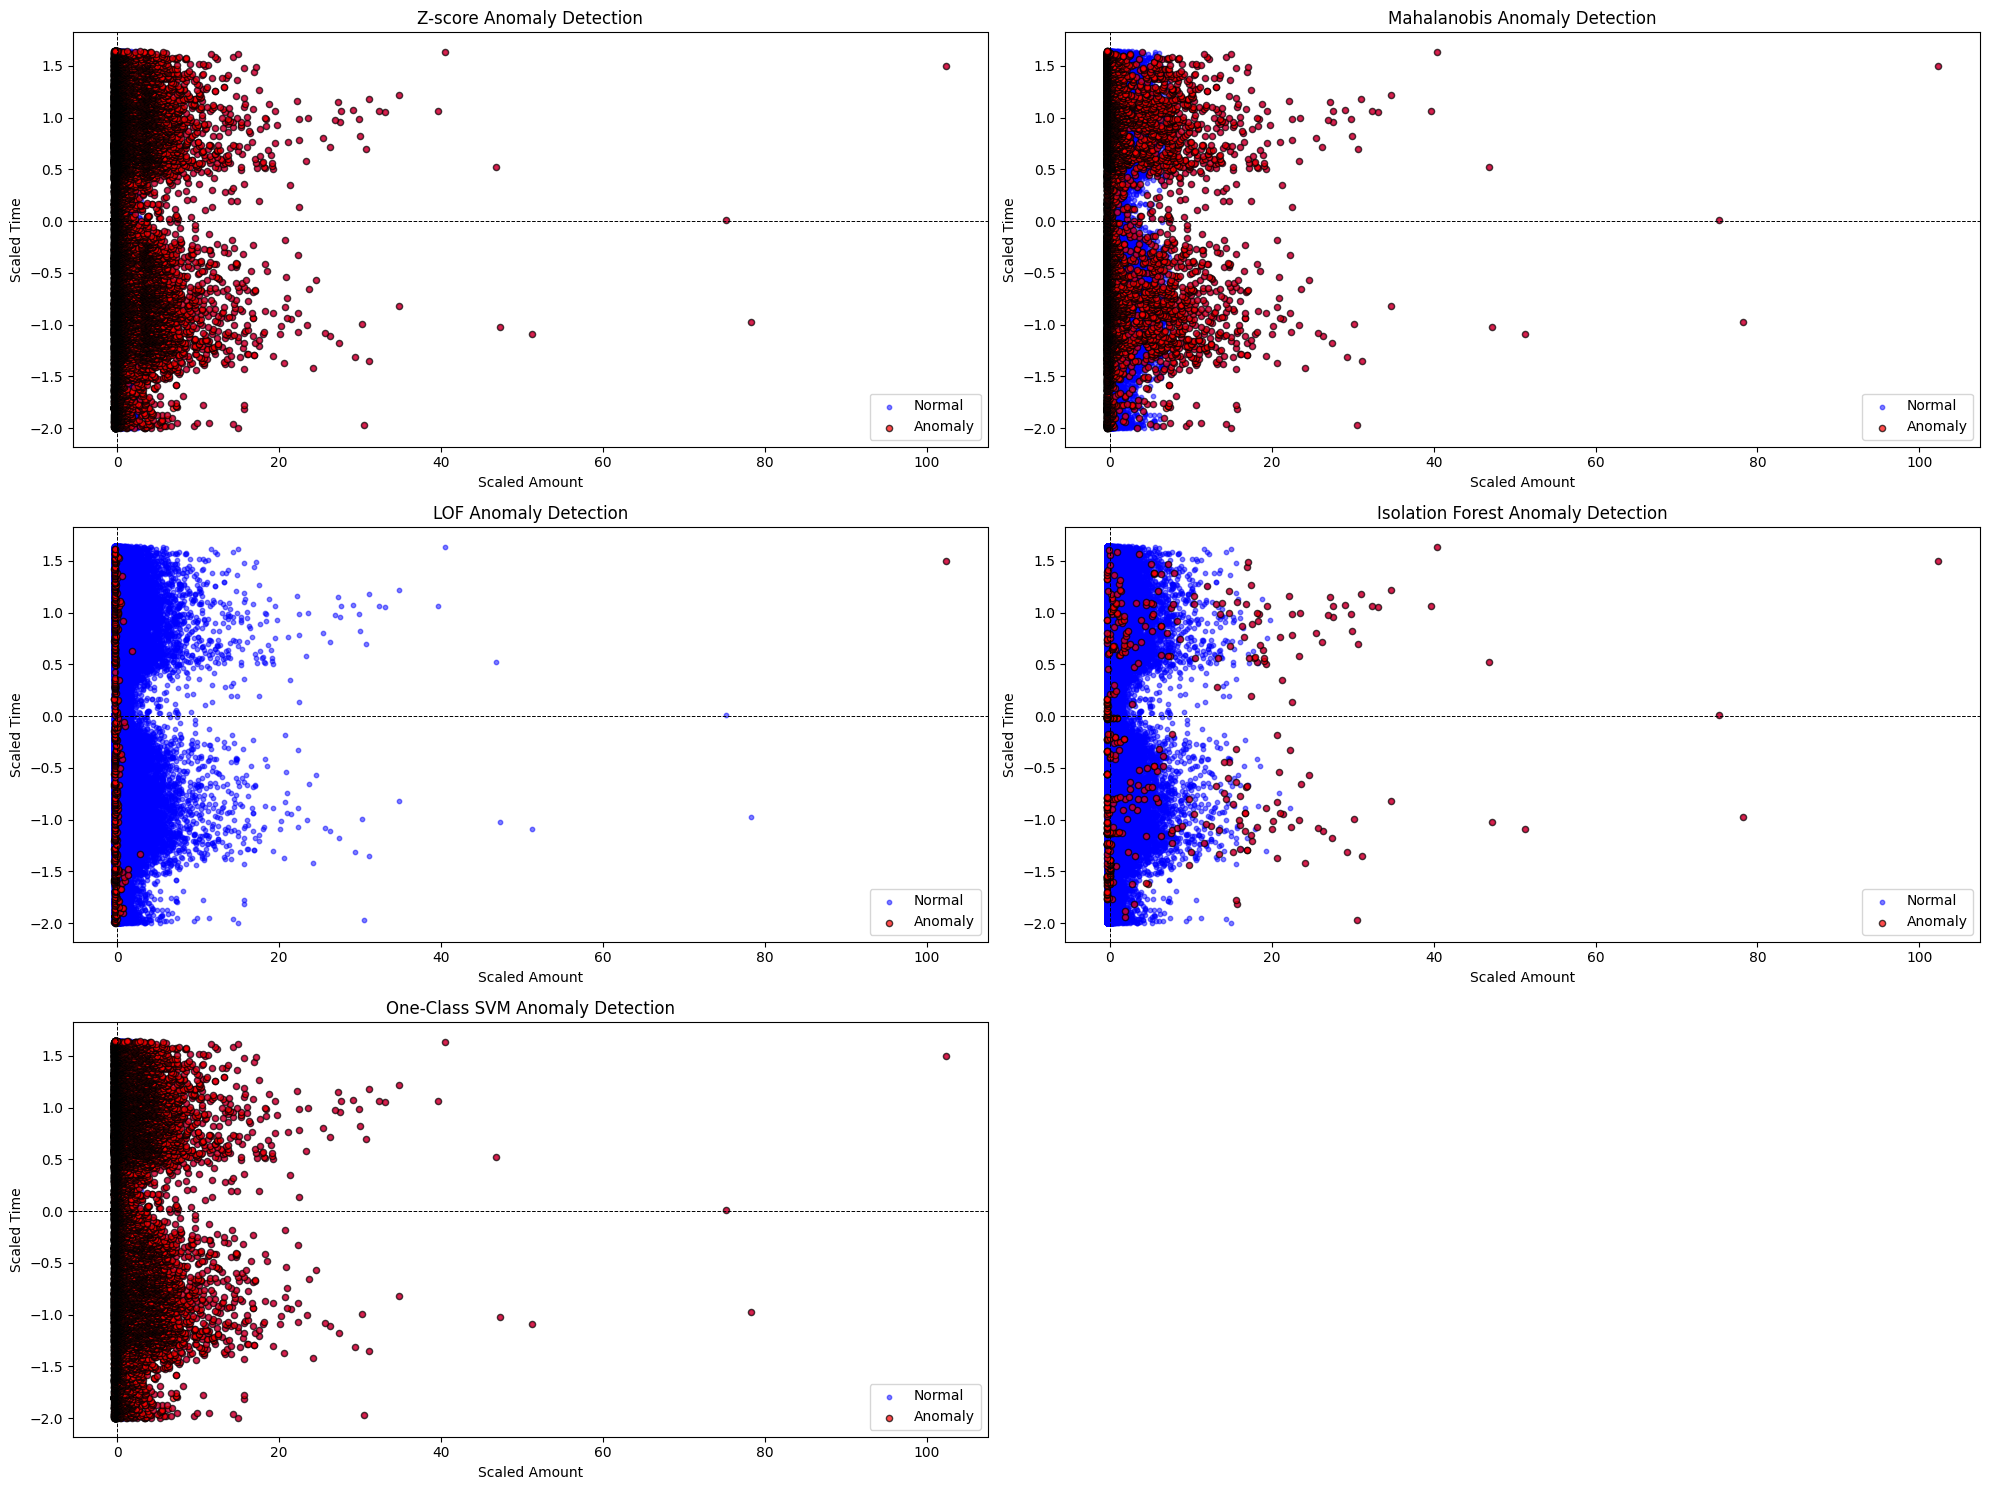

In [59]:
predictions = [z_anomalies, mahalanobis_anomalies, lof_anomalies, isolation_anomalies, ocsvm_anomalies]
methods = ["Z-score", "Mahalanobis", "LOF", "Isolation Forest", "One-Class SVM"]

plt.figure(figsize=(20, 15))

for i, (method, preds) in enumerate(zip(methods, predictions)):
    plt.subplot(3, 2, i + 1)
    
    plt.scatter(df['Amount_scaled'][df['Class'].values == 0], df['Time_scaled'][df['Class'].values == 0],
                color='blue', alpha=0.5, label='Normal', s=10)
    
    plt.scatter(df['Amount_scaled'][preds == 1], df['Time_scaled'][preds == 1],
                color='red', alpha=0.7, label='Anomaly', s=20, edgecolor='black')

    plt.title(f"{method} Anomaly Detection")
    plt.xlabel('Scaled Amount')
    plt.ylabel('Scaled Time')
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.7)  
    plt.axvline(x=0, color='k', linestyle='--', linewidth=0.7) 
    plt.legend()
    
plt.tight_layout()
plt.show()

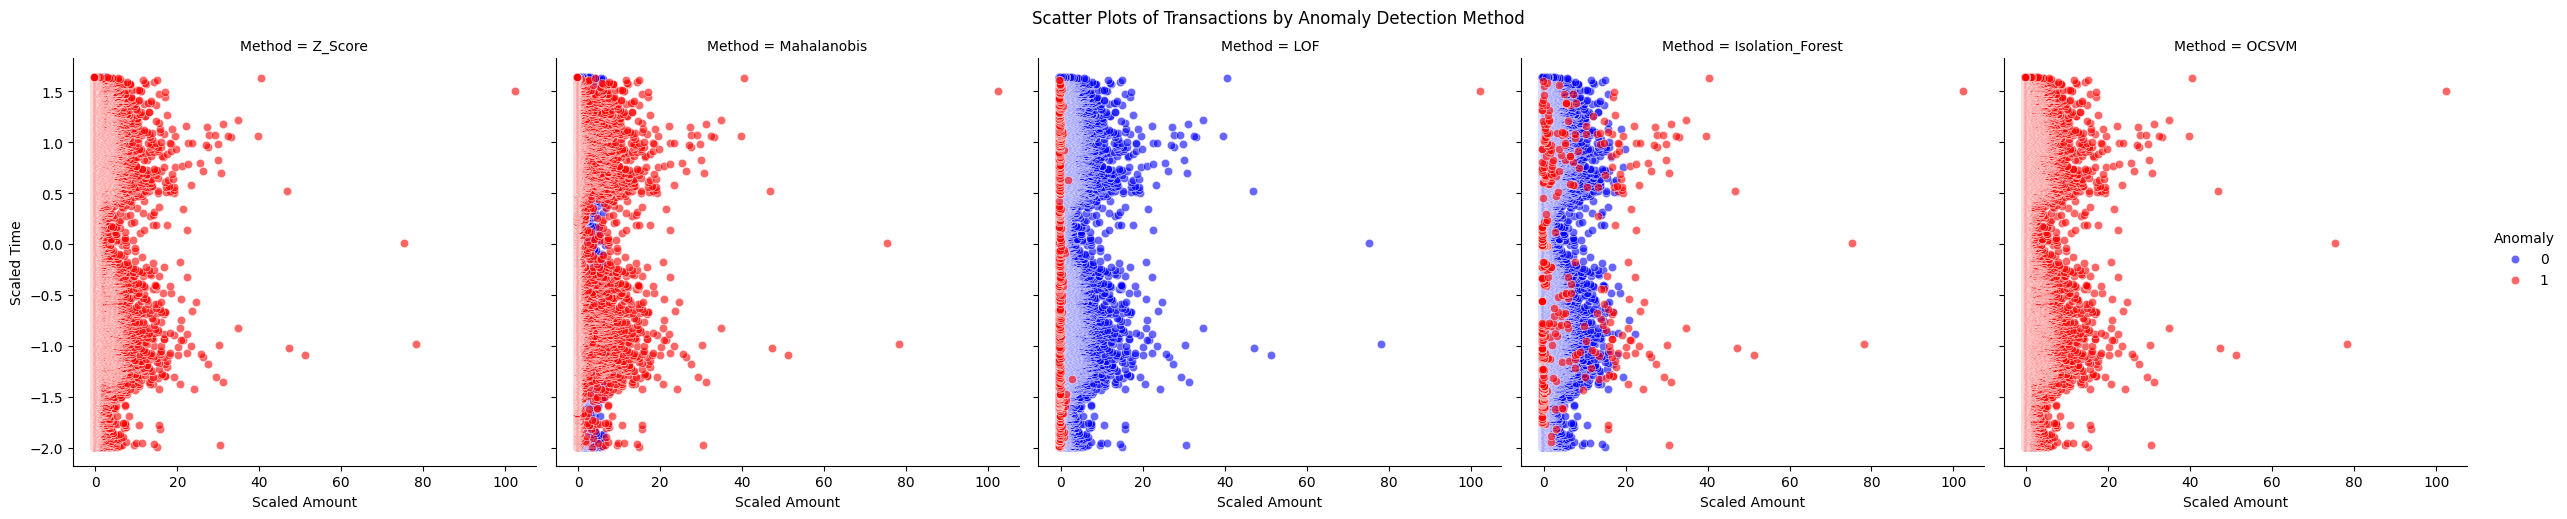

In [55]:
facet_data = pd.DataFrame({
    'Amount_scaled': df['Amount_scaled'],
    'Time_scaled': df['Time_scaled'],
    'Z_Score': z_anomalies,
    'Mahalanobis': mahalanobis_anomalies,
    'LOF': lof_anomalies,
    'Isolation_Forest': isolation_anomalies,
    'OCSVM': ocsvm_anomalies
})

facet_data = facet_data.melt(id_vars=['Amount_scaled', 'Time_scaled'],
                              value_vars=['Z_Score', 'Mahalanobis', 
                                          'LOF', 'Isolation_Forest', 'OCSVM'],
                              var_name='Method', value_name='Anomaly')

g = sns.FacetGrid(facet_data, col="Method", hue="Anomaly", palette={0: 'blue', 1: 'red'},
                  height=5, aspect=1)
g.map(sns.scatterplot, "Amount_scaled", "Time_scaled", alpha=0.6)
g.add_legend()
g.set_axis_labels("Scaled Amount", "Scaled Time")
g.fig.suptitle('Scatter Plots of Transactions by Anomaly Detection Method', y=1.03)
plt.show()

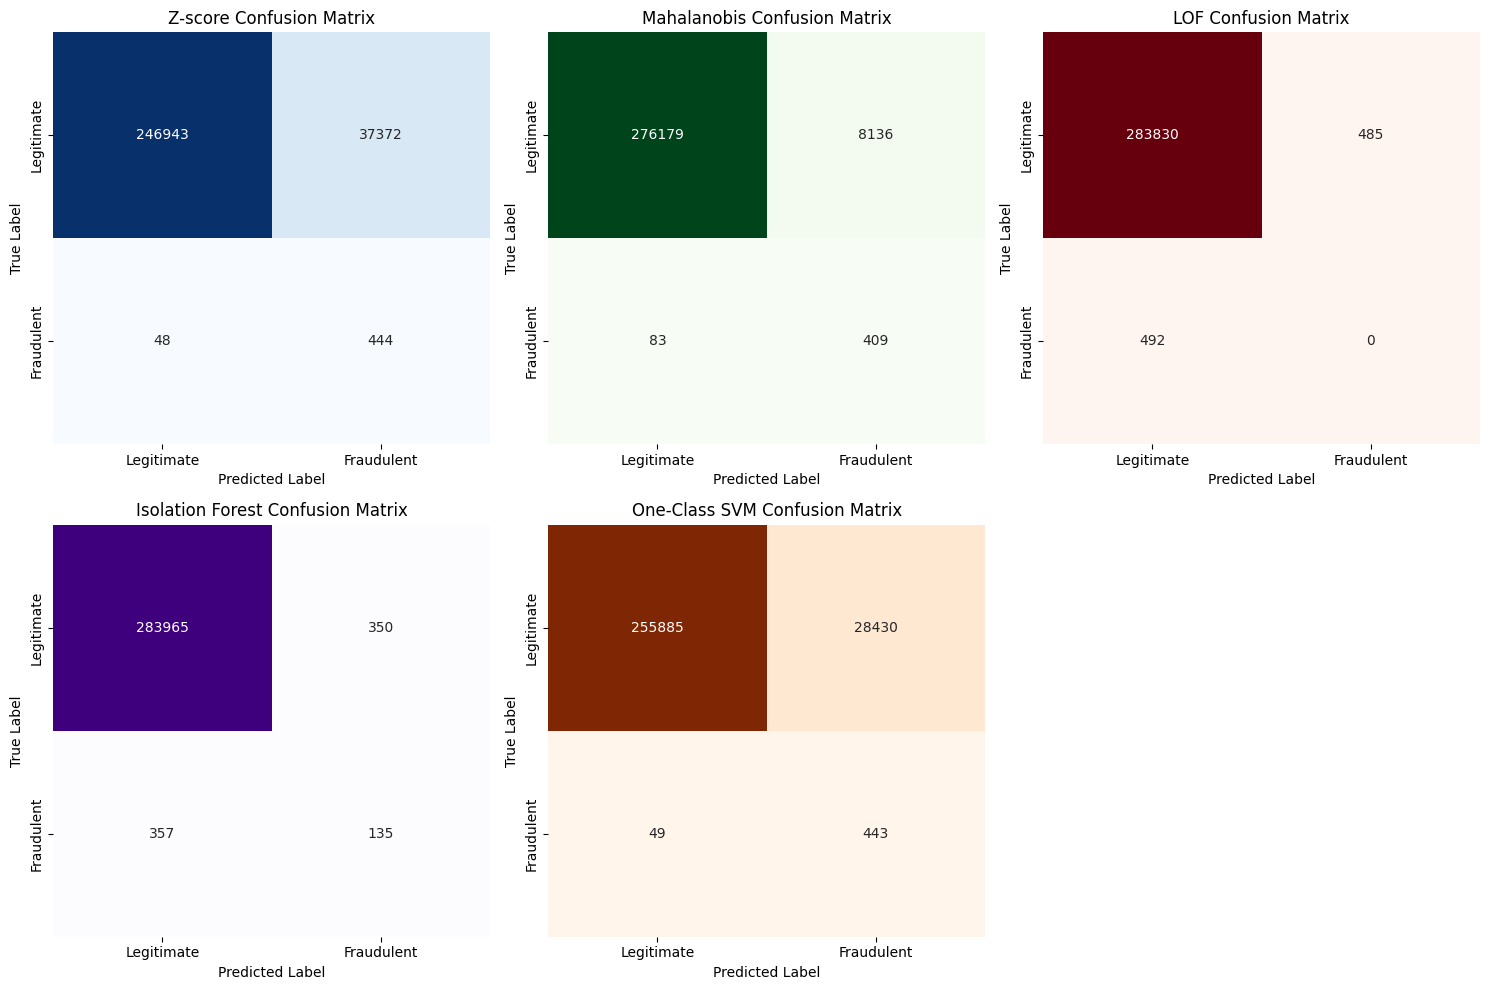

In [76]:
methods = ["Z-score", "Mahalanobis", "LOF", "Isolation Forest", "One-Class SVM"]
colors = ['Blues', 'Greens', 'Reds', 'Purples', 'Oranges']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, method, preds, color in zip(axes, methods, predictions, colors):
    cm = confusion_matrix(df['Class'].values, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, ax=ax, cbar=False,
                xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
    ax.set_title(f'{method} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

for i in range(len(methods), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()